# Spaceship Titanic  .....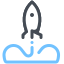
>  **Predict which passengers are transported to an alternate dimension**                  
## Author: RIDDY MAZUMDER
## 🔗 Connect with Me
> [![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/riddymazumder)
> [![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/RiddyMazumder)
> [![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/riddy-mazumder-7bab46338/)
> [![Gmail](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:riddymazumder1971@gmail.com)

## Description 
**This notebook follows a complete end-to-end data science workflow, from loading data to model evaluation and final submission.**  
****Each section is clearly explained and well-structured for learning and presentation.****

## 1. Libraries Required

****In this section, we import all the necessary Python libraries used throughout the project.****  
**These include libraries for**:
- **Data manipulation**  
- **Visualization** 
- **Machine learning**

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt ###Data Visualzation
import seaborn as sns###Data Visualzation
from sklearn.impute import KNNImputer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## 2. Load Dataset

In [50]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_test['Transported'] = False
df = pd.concat([df_train, df_test], sort = False)
df.drop(['Name', 'PassengerId'], axis = 1, inplace = True)
df.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## 3. Data Exploration & Cleaning

## 3.1 Overview

**Check shape, missing values, data types.**

In [23]:
df.shape[0] == df_train.shape[0] + df_test.shape[0]

True

In [24]:
df.isna().sum()

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
dtype: int64

## 3.2 Visualization

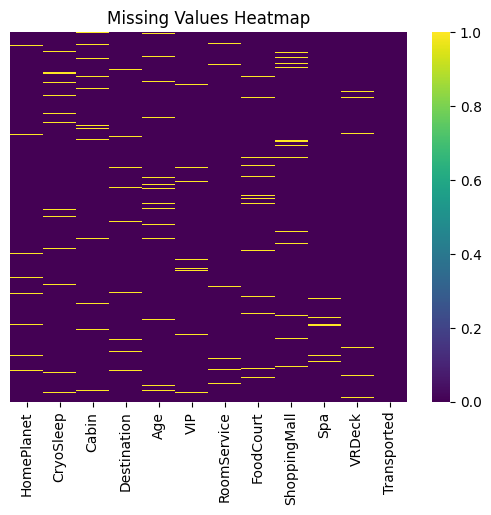

Missing Data Summary:



,Missing_Values,Percentage,Data_Type
CryoSleep,310,2.390131,object
ShoppingMall,306,2.359291,float64
Cabin,299,2.305320,object
VIP,296,2.282190,object
FoodCourt,289,2.228219,float64
HomePlanet,288,2.220509,object
Spa,284,2.189668,float64
Destination,274,2.112567,object
Age,270,2.081727,float64
VRDeck,268,2.066307,float64


In [51]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
missing_data = pd.DataFrame({
    'Missing_Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Values'] > 0]

missing_data = missing_data.sort_values(by='Missing_Values', ascending=False)

print("Missing Data Summary:\n")
display(missing_data)

## 3.3 Filling missing values

In [25]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand = True)
df = df.drop(columns = ['Cabin'])
df['Deck'] = df['Deck'].fillna('U')
df['Num'] = df['Num'].fillna(-1)
df['Side'] = df['Side'].fillna('U')

In [26]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

# 3.4 Encoding 

In [27]:
df['Deck'] = df['Deck'].map({'G' : 0, 'F' : 1, 'E' : 2, 'D' : 3, 'C' : 4, 'B' : 5, 'A' : 6, 'U' : 7, 'T' : 8})
df['Side'] = df['Side'].map({'U' : -1, 'P' : 1, 'S' : 2})

In [28]:
impute_lis = ['Age', 'VIP', 'Num', 'CryoSleep', 'Side', 'Deck', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
rest = list(set(df.columns) - set(impute_lis))
df_rest = df[rest]
imp = KNNImputer()
df_imputed = imp.fit_transform(df[impute_lis])
df_imputed = pd.DataFrame(df_imputed, columns = impute_lis)
df = pd.concat([df_rest.reset_index(drop = True), df_imputed.reset_index(drop = True)], axis = 1)

In [29]:
df['HomePlanet'] = df['HomePlanet'].fillna('U')
df['Destination'] = df['Destination'].fillna('U')
category_colls = ['HomePlanet', 'Destination']

for col in category_colls:
    df = pd.concat([df, pd.get_dummies(df[col], prefix = col)], axis = 1)



# 3.5 Remove irrelevant columns

In [30]:
df = df.drop(columns = category_colls)

In [31]:
df.head()

,Transported,Age,VIP,Num,CryoSleep,Side,Deck,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_U,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_U
0,False,39.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,True,False
1,True,24.0,0.0,0.0,0.0,2.0,1.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,True,False
2,False,58.0,1.0,0.0,0.0,2.0,6.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,True,False
3,False,33.0,0.0,0.0,0.0,2.0,6.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,True,False
4,True,16.0,0.0,1.0,0.0,2.0,1.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,True,False


# 3.6 Feature engineering

In [32]:
#feature engineering
bill_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['amt_spent'] = df[bill_cols].sum(axis = 1)
df['std_amt_spent'] = df[bill_cols].std(axis = 1)
df['mean_amt_spent'] = df[bill_cols].mean(axis = 1)

df['3_high_cols'] = df['CryoSleep'] + df['HomePlanet_Europa'] + df['Destination_55 Cancri e']
df['3_low_cols'] = df['mean_amt_spent'] + df['amt_spent'] + df['HomePlanet_Earth']

In [33]:
df.corr()['Transported'].sort_values(ascending = False)

Transported                  1.000000
CryoSleep                    0.324335
3_high_cols                  0.284152
HomePlanet_Europa            0.131977
Destination_55 Cancri e      0.083625
Deck                         0.077959
Side                         0.059872
FoodCourt                    0.034746
HomePlanet_U                 0.006403
HomePlanet_Mars              0.005643
ShoppingMall                 0.004154
Destination_PSO J318.5-22    0.000760
Destination_U               -0.000554
VIP                         -0.018720
Num                         -0.035240
Age                         -0.050450
Destination_TRAPPIST-1e     -0.072731
HomePlanet_Earth            -0.119644
std_amt_spent               -0.121135
amt_spent                   -0.140425
mean_amt_spent              -0.140425
3_low_cols                  -0.140448
VRDeck                      -0.142783
Spa                         -0.154759
RoomService                 -0.174781
Name: Transported, dtype: float64

In [34]:
df_train, df_test = df[:df_train.shape[0]], df[df_train.shape[0]:]
df_test = df_test.drop(columns = 'Transported')
df_train.shape, df_test.shape

((8693, 25), (4277, 24))

## 4. Model Building
**Libraries Required**

In [35]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


# 4.1 Split Data

In [36]:
X = df_train.drop(columns = 'Transported')
y = df_train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()
model_4 = XGBClassifier()
model_5 = LGBMClassifier()

In [ ]:
X → all features (input variables)
y → target variable (Transported, 0 or 1)
Resulting shapes
X_train → features for training
X_test → features for validation
y_train → target for training
y_test → target for validation

# 4.2 Train Model,Evaluate Model

In [37]:
model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7751581368602645

In [38]:
model_2.fit(X_train, y_train)
pred = model_2.predict(X_test)
accuracy_score(y_test, pred)

0.7584818861414606

In [39]:
model_3.fit(X_train, y_train)
pred = model_3.predict(X_test)
accuracy_score(y_test, pred)

0.7872340425531915

In [40]:
model_4.fit(X_train, y_train)  
pred = model_4.predict(X_test)
accuracy_score(y_test, pred)

0.7832087406555491

## 5. Model Accuracy_Score
**Predictions on training data**

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_4, X_train, y_train, cv=5, scoring='accuracy')
print("CV mean:", scores.mean())

CV mean: 0.7993960144608971


# 6. Submission File

In [47]:
df_dummy = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
pred = model_4.predict(df_test)

final = pd.DataFrame()
final['PassengerId'] = df_dummy['PassengerId']
final['Transported'] = pred

final.to_csv('submission.csv', index = False)